<a href="https://colab.research.google.com/github/Poornima205f6/ml.project/blob/main/Final_Ml_project_Thoracic_Surgery_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

>Predicting whether a patient will survive the first year after lung cancer surgery - using machine learning.

> ● perform data exploration, preprocessing and visualization

> ● implement classification model using sklearn library

> ● evaluate the model using appropriate performance metrics

> ● develop the Thoracic Surgery Prediction system.











**CONTENT**

> The data is dedicated to classification problems related to the post-operative life expectancy in the lung cancer patients after thoracic surgery in which there are two classes class 1 - the death of patients within one year after surgery and class 2 – the patients who survive.The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007 to 2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.



**Data Dictionary**

> The following are the features we'll use to predict our target variable (1 year survival period) -

**1** ID

**2** DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)

**3** PRE4: Forced vital capacity - FVC (numeric) (Forced vital capacity (FVC) is the total amount of air exhaled during the FEV test

It measures how much air you can forcibly exhale after taking a deep breath.

which is a common breathing test to check lung function.)

**4** PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)(Forced expiratory volume (FEV) refers to the volume of air that an individual can exhale during a forced breath in t seconds.)

**5** PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)

**6** PRE7: Pain before surgery (T,F)

**7** PRE8: Haemoptysis before surgery (T,F) - blood vomit

**8** PRE9: Dyspnoea before surgery (T,F) - difficulty ofn breadth

**9** PRE10: Cough before surgery (T,F)

**10** PRE11: Weakness before surgery (T,F)

**11** PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)

**12** PRE17: Type 2 DM - diabetes mellitus (T,F)

**13** PRE19: MI up to 6 months (T,F) - heart attack

**14** PRE25: PAD - peripheral arterial diseases (T,F)

**15** PRE30: Smoking (T,F)

**16** PRE32: Asthma (T,F)

**17** AGE: Age at surgery (numeric)

**18** Risk1Y: 1 year survival period - (T)rue value if died (T,F)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
import pandas as pd
import io
df = pd.read_csv('ThoraricSurgery.csv')
df.head()


,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [ ]:
#find mean, std etc for numeric data
df.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [ ]:
df.shape

(470, 18)

In [ ]:
df.columns
# row index labels and column index labels

Index(['id', 'DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10',
       'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE',
       'Risk1Yr'],
      dtype='object')

In [ ]:
#Check the number of missing values in each column
df.isnull()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Checking if we have 0 value in float dtypes
df[(df['PRE4'] == 0) | (df['PRE5'] == 0)]

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr


In [ ]:
#T = 1, F = 0
df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25',
     'PRE30', 'PRE32', 'Risk1Yr']] = df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
                                          'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32',
                                          'Risk1Yr']].apply(lambda x: np.where(x == 'T', 1, 0))


In [ ]:
df.dtypes

id           int64
DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7         int64
PRE8         int64
PRE9         int64
PRE10        int64
PRE11        int64
PRE14       object
PRE17        int64
PRE19        int64
PRE25        int64
PRE30        int64
PRE32        int64
AGE          int64
Risk1Yr      int64
dtype: object

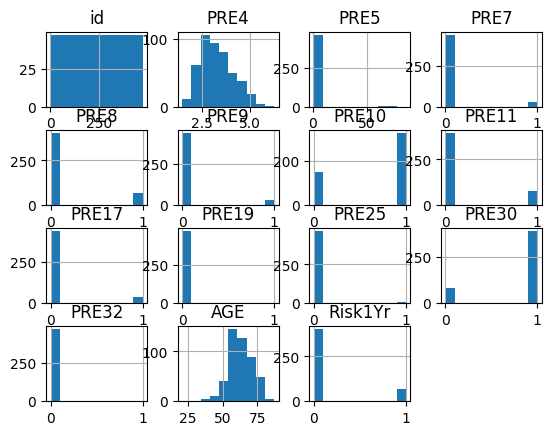

In [ ]:
df.hist()
plt.show()

In [ ]:
#correlation
df.corr()

<ipython-input-365-a46c601d5826>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,1.000000,-0.034985,0.029563,0.052724,0.027238,-0.061885,0.008845,0.027271,-0.009229,-0.016382,-0.015761,-0.038681,-0.042400,-0.005826,-0.074924
PRE4,-0.034985,1.000000,0.032975,0.019786,-0.095827,0.055829,-0.052770,-0.100242,-0.115145,-0.009135,-0.035584,-0.012009,-0.060578,-0.290178,-0.046374
PRE5,0.029563,0.032975,1.000000,0.161615,0.102979,0.260073,-0.099914,-0.086103,-0.022251,-0.013617,-0.025088,-0.100853,-0.016509,-0.115900,-0.042841
PRE7,0.052724,0.019786,0.161615,1.000000,0.256225,0.067529,-0.024115,-0.072455,0.022578,-0.017372,-0.034968,-0.077406,-0.017372,0.044789,0.057375
PRE8,0.027238,-0.095827,0.102979,0.256225,1.000000,0.134386,0.081772,0.060393,-0.001471,-0.026886,0.086156,-0.044942,-0.026886,0.086705,0.065785
PRE9,-0.061885,0.055829,0.260073,0.067529,0.134386,1.000000,0.049843,-0.072455,-0.042725,-0.017372,0.097572,-0.077406,-0.017372,-0.015331,0.105530
PRE10,0.008845,-0.052770,-0.099914,-0.024115,0.081772,0.049843,1.000000,0.202245,0.016551,0.044101,0.017815,0.200373,-0.026401,0.149589,0.088860
PRE11,0.027271,-0.100242,-0.086103,-0.072455,0.060393,-0.072455,0.202245,1.000000,0.069522,0.058695,0.029726,0.118527,-0.029161,0.208003,0.086467
PRE17,-0.009229,-0.115145,-0.022251,0.022578,-0.001471,-0.042725,0.016551,0.069522,1.000000,-0.018543,0.025328,-0.036906,-0.018543,0.085081,0.108974
PRE19,-0.016382,-0.009135,-0.013617,-0.017372,-0.026886,-0.017372,0.044101,0.058695,-0.018543,1.000000,-0.008602,0.030496,-0.004274,-0.030320,-0.027347


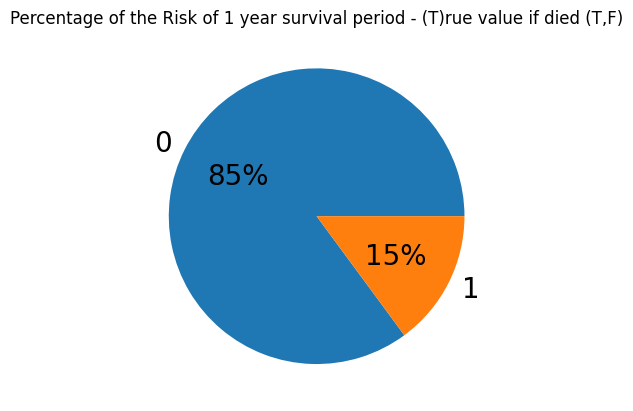

In [ ]:
#Percentage of the Risk of 1 year period of survival
df.groupby('Risk1Yr').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%')
plt.title('Percentage of the Risk of 1 year survival period - (T)rue value if died (T,F)')
plt.show()

In [ ]:
df['DGN'].value_counts()

DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64

In [ ]:
#dropping unwanted columns
df=df.drop('id',axis=1)

In [ ]:
df.DGN=df.DGN.replace({"DGN3":3,"DGN2":2,"DGN4":4,"DGN5":5,"DGN6":0,"DGN8":8,"DGN1":1})
df.PRE6=df.PRE6.replace({"PRZ1":1,"PRZ0":0,"PRZ2":2})
df.PRE14=df.PRE14.replace({"OC12":2,"OC11":1,"OC13":3,"OC14":4})

In [ ]:
df.columns

In [ ]:
#Creation of a Model
#Take the X and y value
x=df.drop('Risk1Yr',axis=1)
x

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2,3.88,2.12,1,0,0,0,1,0,3,0,0,0,1,0,63
466,3,3.76,3.12,0,0,0,0,0,0,1,0,0,0,1,0,61
467,3,3.04,2.08,1,0,0,0,1,0,3,0,0,0,0,0,52
468,3,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,79


In [ ]:
df.dtypes

DGN          int64
PRE4       float64
PRE5       float64
PRE6         int64
PRE7         int64
PRE8         int64
PRE9         int64
PRE10        int64
PRE11        int64
PRE14        int64
PRE17        int64
PRE19        int64
PRE25        int64
PRE30        int64
PRE32        int64
AGE          int64
Risk1Yr      int64
dtype: object

In [ ]:
y=df.Risk1Yr
y

0      0
1      0
2      0
3      0
4      1
      ..
465    0
466    0
467    0
468    0
469    0
Name: Risk1Yr, Length: 470, dtype: int64

In [ ]:
y.value_counts()

0    400
1     70
Name: Risk1Yr, dtype: int64

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
x, y = smote_enn.fit_resample(x,y)

In [ ]:
y.value_counts()

1    342
0    204
Name: Risk1Yr, dtype: int64

In [ ]:
df['DGN'].value_counts()

3    349
2     52
4     47
5     15
0      4
8      2
1      1
Name: DGN, dtype: int64

In [ ]:
df.dtypes

DGN          int64
PRE4       float64
PRE5       float64
PRE6         int64
PRE7         int64
PRE8         int64
PRE9         int64
PRE10        int64
PRE11        int64
PRE14        int64
PRE17        int64
PRE19        int64
PRE25        int64
PRE30        int64
PRE32        int64
AGE          int64
Risk1Yr      int64
dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)
# Train the classifier on the training data
dtc.fit(X_train, y_train)
# Use the classifier to make predictions on the test data
y_pred = dtc.predict(X_test)

In [ ]:
features_names = x.columns

In [ ]:
feature_importances = pd.DataFrame({'features':features_names, 'Importance': dtc.feature_importances_*10000})
feature_importances
indices = np.argsort(feature_importances['Importance'])[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_importances['features'][i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), feature_importances['Importance'][indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
#Import the accuracy_score from the sklearn
from sklearn.metrics import accuracy_score
#The accuracy_score method of the sklearn. metrics package assigns subset accuracy in multi-label classification.
#It is required that the labels the model has predicted for the given sample and the true labels of the sample match exactly.
#Accuracy describes the model's behaviour across all classes.
x1 = accuracy_score(y_test,y_pred)*100
x1

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
print("Confusion Matrix for Decision Tree")

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
performance=confusion_matrix(y_test,y_pred)
performance

array([[39, 10],
       [ 6, 55]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 30, criterion="entropy", random_state=42)
# Train the classifier on the training data
rf.fit(X_train, y_train)
# Use the classifier to make predictions on the test data
y_pred = rf.predict(X_test)

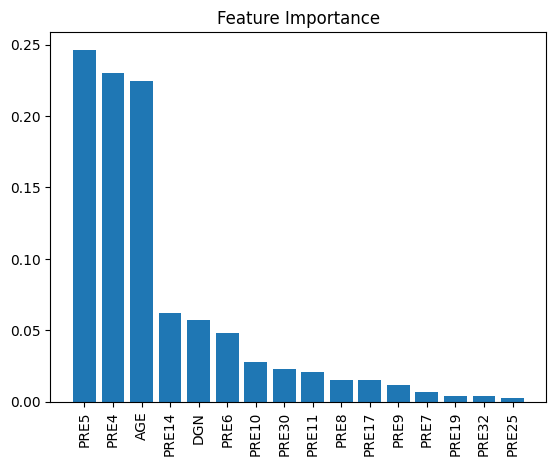

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
x2 = accuracy_score(y_test,y_pred)*100
x2

86.36363636363636

In [ ]:
performance=confusion_matrix(y_test,y_pred)
performance

array([[38, 11],
       [ 4, 57]])

Confusion Matrix for Random Forest


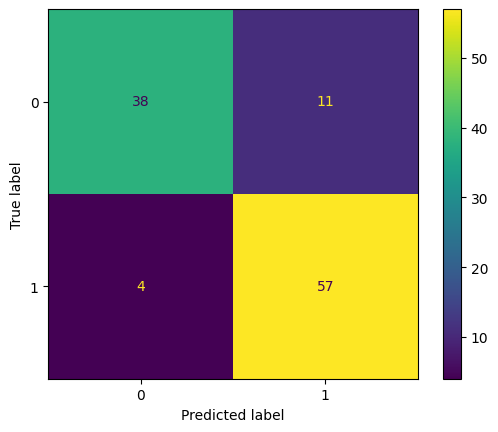

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
print("Confusion Matrix for Random Forest")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()

In [ ]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

In [ ]:
scores

[0.9336206896551724,
 0.924503657262278,
 0.8808254963427379,
 0.9083333333333332,
 0.8623824451410658,
 0.8646812957157785,
 0.834848484848485,
 0.8280564263322884,
 0.8050679205851619,
 0.8074973876698015,
 0.7959770114942529,
 0.8097439916405433,
 0.7868077324973877,
 0.7845611285266458,
 0.7730407523510971,
 0.7639759665621735,
 0.7479101358411703,
 0.7570794148380355,
 0.7478578892371995,
 0.7524294670846394,
 0.7431818181818182,
 0.7477795193312434,
 0.7386102403343783,
 0.7477533960292582,
 0.7339864158829676,
 0.7339602925809823,
 0.7338819226750262,
 0.7338819226750262,
 0.7269853709508882,
 0.7246865203761755]

In [ ]:
ma = max(scores)
m = scores.index(ma)
m += 1
knn = KNeighborsClassifier(n_neighbors = m)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
x3 = accuracy_score(y_test,y_pred_knn)*100
x3

93.63636363636364

In [ ]:
performance=confusion_matrix(y_test,y_pred_knn)
performance

array([[44,  5],
       [ 2, 59]])

Confusion Matrix for KNN


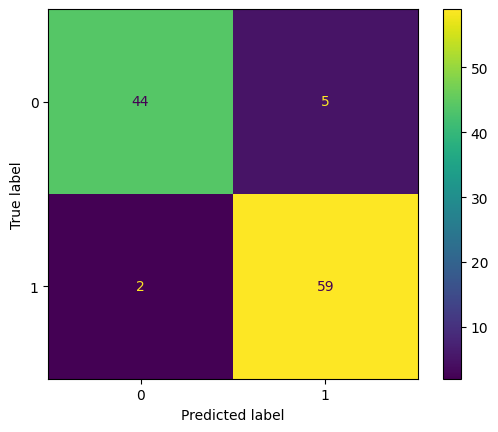

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
print("Confusion Matrix for KNN")

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svm = SVC(kernel='linear', random_state=42,probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
x4 = accuracy_score(y_test,y_pred)*100
x4

67.27272727272727

In [ ]:
performance=confusion_matrix(y_test,y_pred)
performance

array([[17, 32],
       [ 4, 57]])

Confusion Matrix for SVM


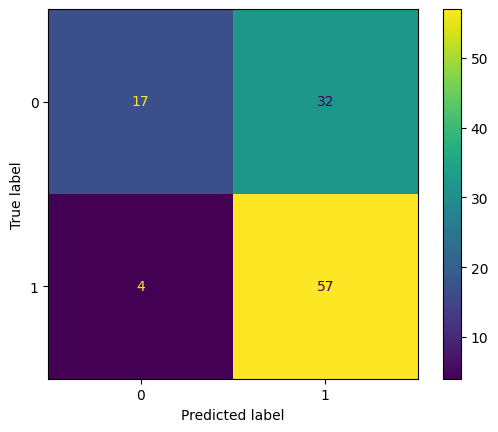

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
print("Confusion Matrix for SVM")

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# fit the model with training data
lr.fit(X_train, y_train)
# make predictions on test set
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
x5 = accuracy_score(y_test,y_pred)*100
x5

67.27272727272727

In [ ]:
performance=confusion_matrix(y_test,y_pred)
performance

array([[19, 30],
       [ 6, 55]])

Confusion Matrix for Logistic Regression


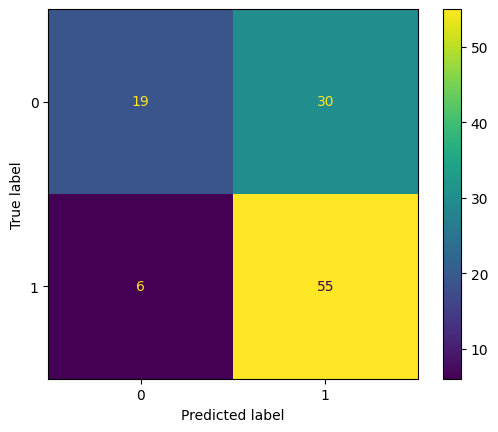

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
print("Confusion Matrix for Logistic Regression")

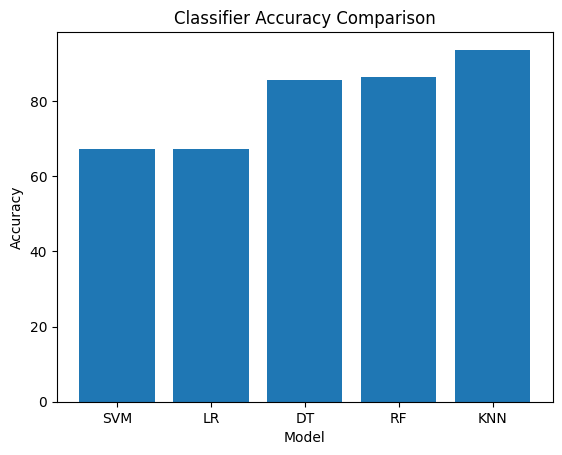


SVM accuracy: 67.27272727272727
Logistic Regression accuracy: 67.27272727272727
Decision Tree accuracy: 85.45454545454545
Random Forest accuracy: 86.36363636363636
KNN accuracy: 93.63636363636364


In [ ]:
x_pos = [0,2,4,6,8]
plt.bar(['SVM', 'LR', 'DT', 'RF', 'KNN'], [x4, x5, x1, x2, x3])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()
print("\nSVM accuracy:", x4)
print("Logistic Regression accuracy:", x5)
print("Decision Tree accuracy:", x1)
print("Random Forest accuracy:", x2)
print("KNN accuracy:", x3)

SVC(kernel='linear', probability=True, random_state=42)
LogisticRegression()
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=1)


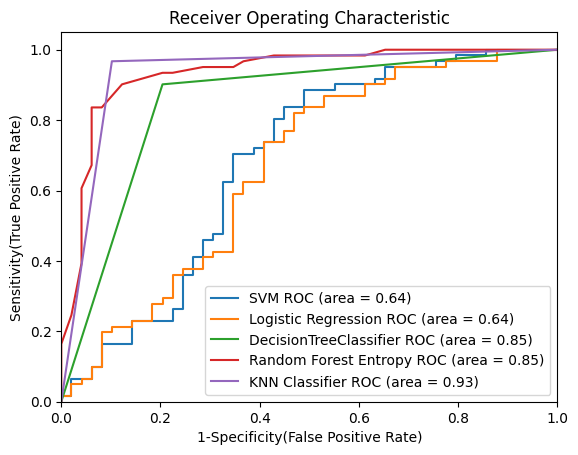

ROC Curve


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
    {
    'label': 'SVM',
    'model': svm,
},
  {
    'label': 'Logistic Regression',
    'model': lr,
},
    {
    'label' : 'DecisionTreeClassifier',
   'model' : dtc,
},
    {
    'label': 'Random Forest Entropy',
    'model': rf,
},
    {
    'label': 'KNN Classifier',
     'model': knn,
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    print(model)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot
# plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('ROC Curve')

In [ ]:
"""!pip install gradio
import gradio as gr
def predict_thoracic_surgery(DNG,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE):
    input = [DNG,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE]

    input_s = np.array(input).reshape(1, -1)

    # Load the pre-trained Random Forest model



    # Make a prediction using the model
    prediction = knn.predict(input_s)[0]
    if prediction == 1:
        return 'The patient is at high risk and may not survive the first year after surgery'
    else:
        return 'The patient is at low risk and may survive the first year after surgery'

inputs = [gr.inputs.Slider(0, 6, default=2, label='DNG'),
          gr.inputs.Slider( 0, 6, default=2.88,label='PRE4'),
          gr.inputs.Slider( 0, 6, default=2.16,label='PRE5'),
          gr.inputs.Slider( 0, 6, default=1,label='PRE6'),
          gr.inputs.Radio([1,0], label='PRE7'),
          gr.inputs.Radio([1,0], label='PRE8'),
          gr.inputs.Radio([1,0], label='PRE9'),
          gr.inputs.Radio([1,0], label='PRE10'),
          gr.inputs.Radio([1,0], label='PRE11'),
          gr.inputs.Slider(1, 5, default=4, label='PRE14'),
          gr.inputs.Radio([1,0], label='PRE17'),
          gr.inputs.Radio([1,0], label='PRE19'),
          gr.inputs.Radio([1,0], label='PRE25'),
          gr.inputs.Radio([1,0], label='PRE30'),
          gr.inputs.Radio([1,0], label='32'),
          gr.inputs.Slider(18, 100, default=50, label='AGE')
          ]

outputs = gr.outputs.Textbox()

gr.Interface(fn=predict_thoracic_surgery, inputs=inputs, outputs=outputs,
            title='Thoracic Surgery Prediction Model',
            description='Enter the patient data and click "Submit" to make a prediction.Here 1 means Yes and 0 means No ',
            theme = 'huggingface',
            css='div {margin-left: auto; margin-right: auto; width: 100%;\
            background-image: url("https://i.stack.imgur.com/Y4kqW.png");}').launch(share = True ,debug=True)
"""


#GUI
import pickle

#pickle model object
with open("rf.pk1", 'wb') as file:
  pickle.dump(rf, file)

In [ ]:
x.drop(columns = ["PRE32","PRE25","PRE17"],axis = 1, inplace = True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)
# Train the classifier on the training data
dtc.fit(X_train, y_train)
# Use the classifier to make predictions on the test data
y_pred = dtc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8727272727272727

In [ ]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

ma = max(scores)
m = scores.index(ma)
m += 1
knn = KNeighborsClassifier(n_neighbors = m)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

xk = accuracy_score(y_test,y_pred_knn)*100
xk

92.72727272727272